n value: 0.8700299859046936
p value: 1.0


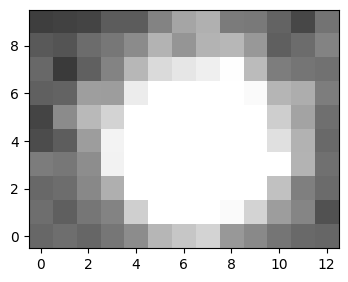

n value: 0.8292299509048462
p value: 4.0939293321479756e-39


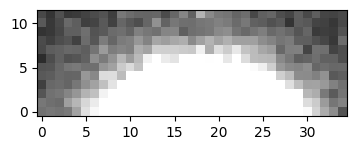

n value: 0.6517399549484253
p value: 1.0


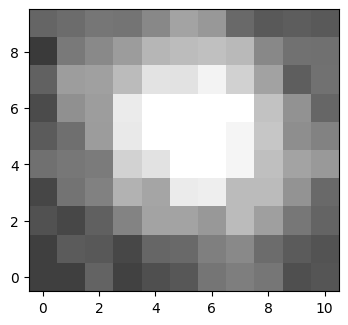

n value: 1.8539899587631226
p value: 1.0


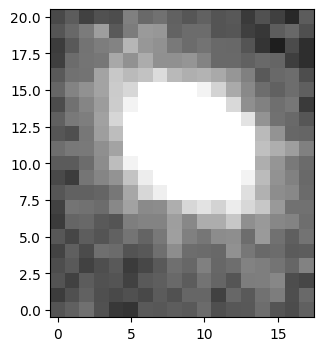

n value: 1.7723199129104614
p value: 1.0


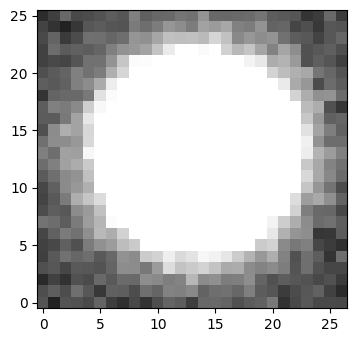

n value: 1.0310699939727783
p value: 1.0


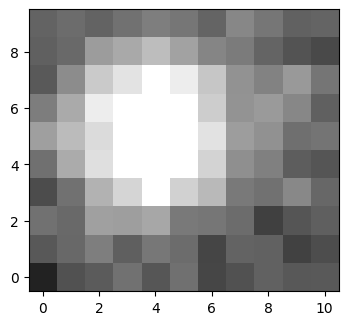

n value: 2.7411298751831055
p value: 0.0


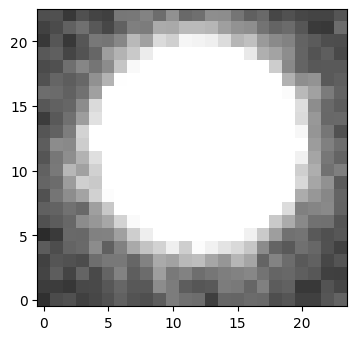

n value: 0.9107399582862854
p value: 1.0


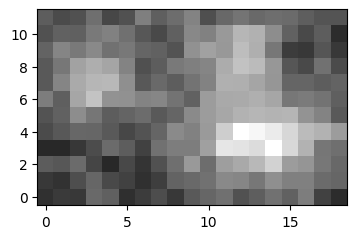

n value: 0.9365899562835693
p value: 1.0


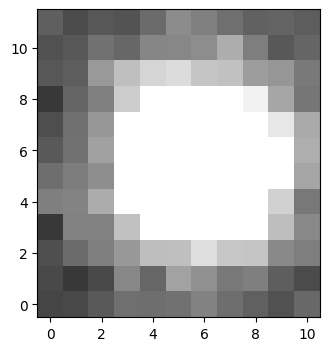

n value: 0.6500399708747864
p value: 1.0


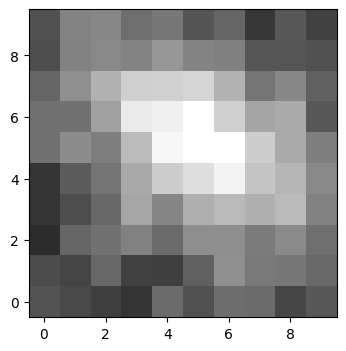

n value: 1.0219500064849854
p value: 1.0


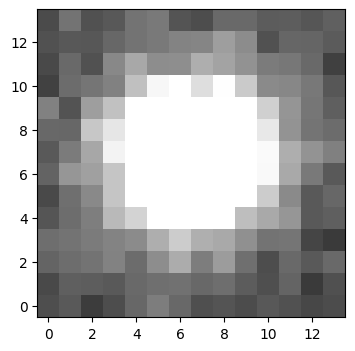

n value: 0.6500099897384644
p value: 1.0


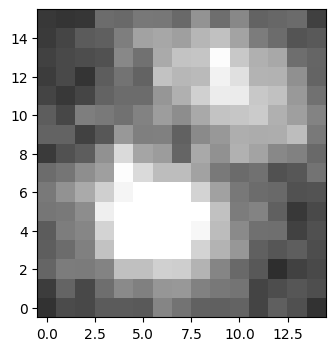

n value: 0.9794099926948547
p value: 1.0


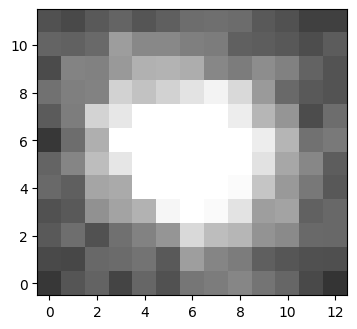

n value: 0.6500099897384644
p value: 1.0


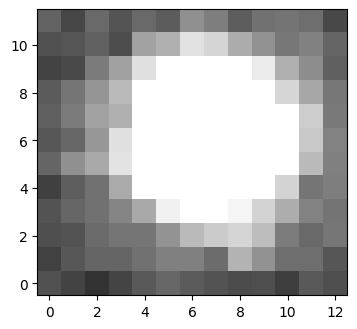

n value: 0.6500299572944641
p value: 1.0


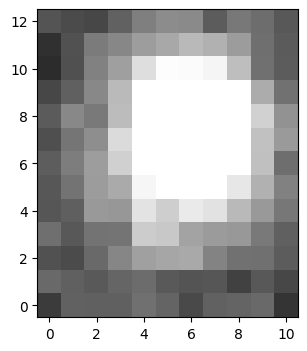

n value: 0.711169958114624
p value: 1.0


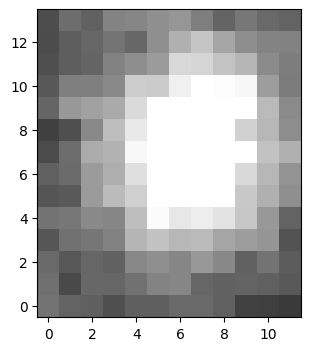

n value: 0.7338799834251404
p value: 1.0


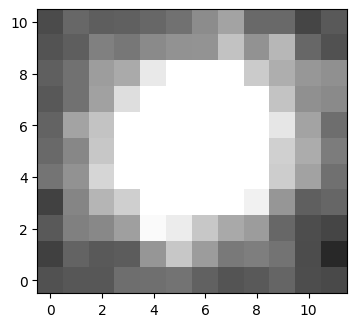

n value: 0.9512400031089783
p value: 1.0


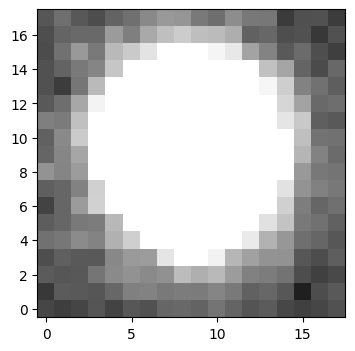

n value: 0.6500099897384644
p value: 1.0


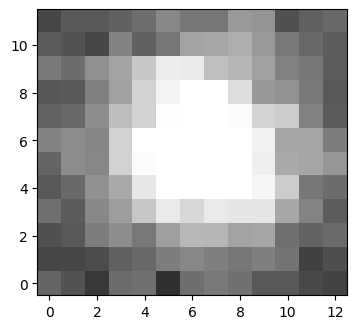

n value: 0.9318899512290955
p value: 0.999999999993358


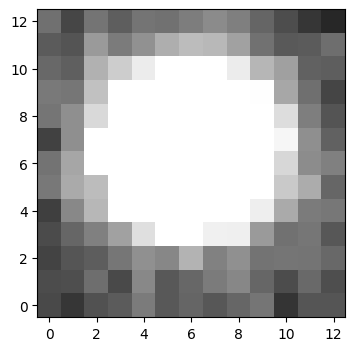

n value: 1.7731800079345703
p value: 1.0


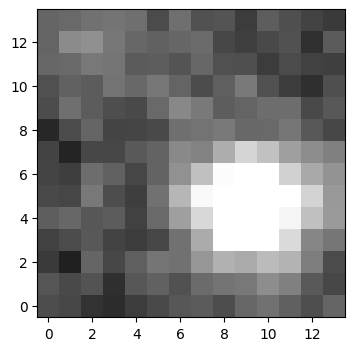

n value: 4.11722993850708
p value: 1.0


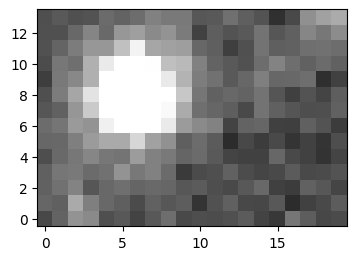

n value: 0.8389999866485596
p value: 1.0


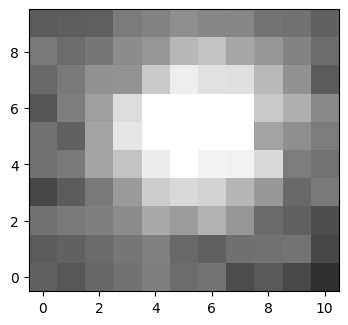

n value: 0.6500099897384644
p value: 1.0


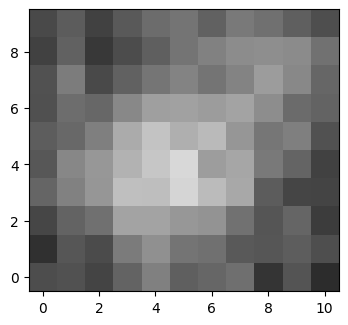

n value: 0.821649968624115
p value: 1.0


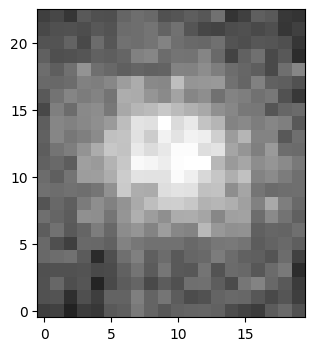

n value: 1.1918200254440308
p value: 1.0


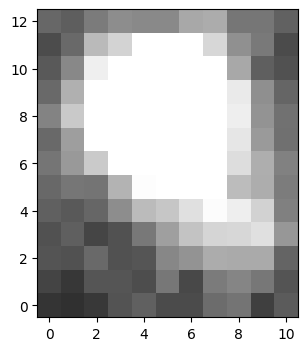

n value: 0.7291100025177002
p value: 1.0


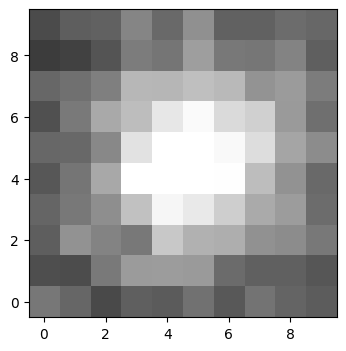

n value: 0.802109956741333
p value: 0.9999999964300221


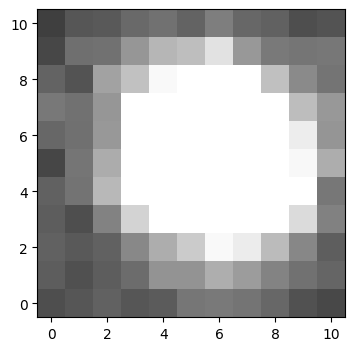

n value: 1.245229959487915
p value: 1.0


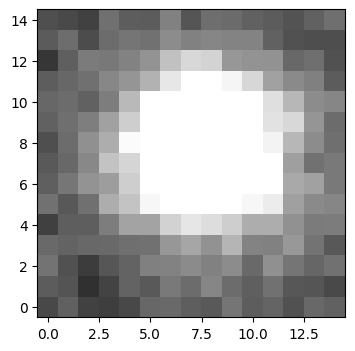

n value: 7.9999098777771
p value: 8.09097777713578e-190


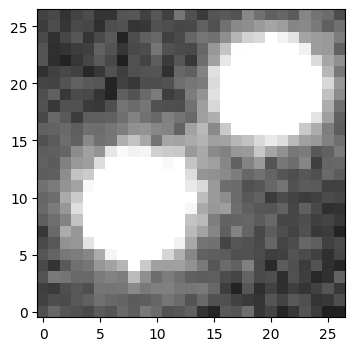

n value: 4.833479881286621
p value: 1.0


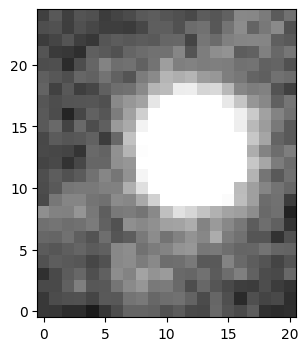

n value: 1.2386999130249023
p value: 3.5034034214889064e-12


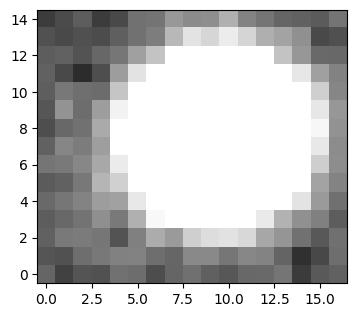

n value: 0.9045699834823608
p value: 0.9999999999999981


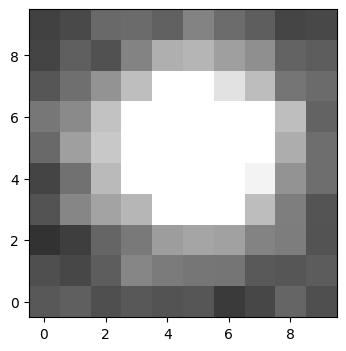

n value: 0.9218999743461609
p value: 1.0


KeyboardInterrupt: 

In [2]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
# open sersic fit file
sersic_fit_hdul = fits.open('sersic_output/morph-stats0.fits')
# open rubin image file
rubin_file_hdul = fits.open('retrieved_fits/image0.fits')
# load segmentation map
segmentation_map = np.load('sersic_output/seg0.npy')

# grab astronomical image from rubin fit file
img_data = rubin_file_hdul[1].data

# grab data from STAT table from sersic fit file
labelled_cutouts = sersic_fit_hdul[1].data

# iterate through all labelled cutouts
for i in range(len(labelled_cutouts)):

    # grab desired sersic values
    # can see all available & name by using print(sersic_fit_hdul[1].columns)
    source_id = labelled_cutouts[i]['ID']
    n = labelled_cutouts[i]['N_VAL']
    p_val = labelled_cutouts[i]['P_VAL']

    print(f"n value: {n}")
    print(f"p value: {p_val}")
    
    # segmentation map is labelled with all source ids
    # this retrieves all indices where the source is at
    x,y = np.where(segmentation_map==source_id)

    # creating bounding box
    xmin, xmax, ymin, ymax = min(x),max(x),min(y),max(y)

    # retrieving cutout from image
    cutout = img_data[xmin:xmax,ymin:ymax]

    # display cutouts iteratively
    fig, ax1 = plt.subplots(1, 1, figsize=(4, 4))
    ax1.imshow(cutout, origin='lower', cmap='gray',vmin=-0.1,vmax=0.3)
    plt.show()